Assignment 8.1.: Sentiment analysis

 Lexicon based methods: VADER algorithm

In [1]:
pip install nltk pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Cristina
[nltk_data]     Ortega\AppData\Roaming\nltk_data...


True

In [4]:
import pandas as pd
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')

#preprocessing
def clean_tweet(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#','', text)
    text = re.sub(r'[^A-Za-z0-9\s]+', '', text)
    text = text.lower().strip()
    tokens = text.split()
    cleaned = ' '.join(tokens)
    return cleaned

def vader_sentiment(text):
    sia = SentimentIntensityAnalyzer()
    score = sia.polarity_scores(text)['compound']
    if score >= 0.05:
        label = 'positive'
    elif score <= -0.05:
        label = 'negative'
    else:
        label = 'neutral'
    return label, score

df = pd.read_csv('tweets-data.csv')
print(df.columns)

Index(['Unnamed: 0', 'Date Created', 'Number of Likes', 'Source of Tweet',
       'Tweets', 'hashtag'],
      dtype='object')


[nltk_data] Downloading package vader_lexicon to C:\Users\Cristina
[nltk_data]     Ortega\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [5]:
df_sample = df.sample(n=500, random_state=42)

df_sample['cleaned_tweet'] = df_sample['Tweets'].apply(clean_tweet)

results = df_sample['cleaned_tweet'].apply(vader_sentiment)

df_sample['sentiment_label'] = results.apply(lambda x: x[0])
df_sample['sentiment_score'] = results.apply(lambda x: x[1])

In [6]:
print(df_sample[['Tweets', 'cleaned_tweet', 'sentiment_label', 'sentiment_score']].head(10))

                                                 Tweets  \
2899  Le #DessinDePresse de Sanaga : ls sont morts c...   
594   #Russia #Wagner #RussiaCivilWar https://t.co/P...   
2870  Exclusive content -https://t.co/oEiSIIB2Z1\n.\...   
52    Auch heute geht die politische Nachricht des T...   
1391  @crazyclipsonly Same type that would take a ho...   
807   #SUGA_AgustD_TOUR_in_Seoul #SUGA_AgustD_TOUR #...   
2761  #Titan mishap: #Implosion with incredible forc...   
196                                     #Wagner #Russia   
1576  #merri le #titanic 2 le retour https://t.co/4s...   
670   Il Segretario di Stato americano #Blinken: "no...   

                                          cleaned_tweet sentiment_label  \
2899  le dessindepresse de sanaga ls sont morts comm...        positive   
594                        russia wagner russiacivilwar         neutral   
2870  exclusive content cosplay japan titan titanics...        negative   
52    auch heute geht die politische nachricht des

In [7]:
print(df_sample['sentiment_label'].value_counts())

neutral     277
negative    118
positive    105
Name: sentiment_label, dtype: int64


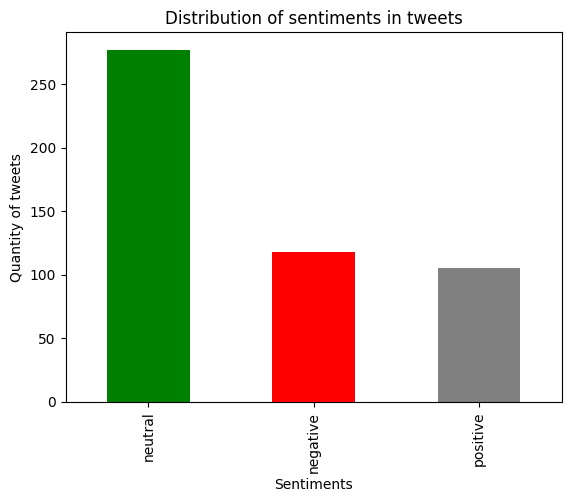

In [8]:
import matplotlib.pyplot as plt

df_sample['sentiment_label'].value_counts().plot(kind='bar', color=['green', 'red', 'grey'])
plt.title('Distribution of sentiments in tweets')
plt.xlabel('Sentiments')
plt.ylabel('Quantity of tweets')
plt.show()